In [253]:
import pandas as pd
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt
import seaborn as sns


In [254]:
vehicles_df = pd.read_csv('../vehicles_us.csv')

In [255]:
print(vehicles_df.head())

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN     1.0  2018-06-23           19  
1    automatic  pickup       white     1.0  2018-10-19           50  
2    automatic   sedan         red     NaN  2019-02-07           79  
3    automatic  pickup         NaN     NaN  2019-03-22            9  
4    automatic   sedan       black     NaN  2019-04-02           28  


In [256]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [257]:
#checking for duplicates
vehicles_df.duplicated().sum()

0

In [258]:
#checking for na.. 
vehicles_df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [259]:
#change price to float with 2 decimals
vehicles_df['price'] = vehicles_df['price'].astype(float).round(2) 

In [260]:
#drop outlier prices
vehicles_df = vehicles_df.drop(vehicles_df[vehicles_df['price'] > 75000].index)

In [261]:
#drop model year rows where data is missing. 
vehicles_df = vehicles_df.dropna(subset='model_year')

In [262]:
#drop model_years < 1958 .. incorrect data
vehicles_df = vehicles_df.drop(vehicles_df[vehicles_df['model_year'] < 1958 ].index)

In [263]:
vehicles_df['model_year'] =  pd.to_datetime(vehicles_df['model_year'],format='%Y').dt.year

In [264]:
#split model column into make and model. 
vehicles_df[['make','model']] = vehicles_df['model'].str.split(' ',n=1, expand=True)
vehicles_df.insert(2, 'make', vehicles_df.pop('make'))


In [265]:
#paint_color column - replace Nan with "unkown" to fix data
vehicles_df['paint_color'].fillna(value="unknown", inplace=True) 

In [266]:
#fill NaN value to 0 in is_4wd column
vehicles_df['is_4wd'].fillna(value=0, inplace=True) 

In [267]:
#change is_4wd to int
vehicles_df['is_4wd'] = vehicles_df['is_4wd'].astype(int) 

In [268]:
#make date_posted a datetime value
vehicles_df['date_posted'] = pd.to_datetime(vehicles_df.date_posted)

In [269]:
vehicles_df.isna().sum()

price              0
model_year         0
make               0
model              0
condition          0
cylinders       4890
fuel               0
odometer        7337
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

In [270]:
#create DF of cars and there cylinders
model_cylinders_df = vehicles_df.groupby(['model_year','make','model','type','cylinders']).size().reset_index() #   [['model_year', 'make', 'model', 'type','cylinders']]

In [271]:
#create dictionary of cars and there cylinders 
cylinders_mapping = model_cylinders_df.set_index(['model_year', 'make', 'model', 'type'])['cylinders'].to_dict()


In [272]:
#replace missing cylinders from the cylinder dictionary
vehicles_df.loc[:, 'cylinders'] = vehicles_df.apply(lambda row: cylinders_mapping.get((row['model_year'],row['make'], row['model'], row['type']), row['cylinders']) if pd.isna(row['cylinders']) else row['cylinders'], axis=1)


In [273]:
#check if any remaining null data in cylinders
vehicles_df.isna().sum()

price              0
model_year         0
make               0
model              0
condition          0
cylinders        116
fuel               0
odometer        7337
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

In [274]:
#drop remaining rows with no cylinder info 
vehicles_df = vehicles_df.dropna(subset='cylinders')

In [275]:
#convert to an interger
vehicles_df['cylinders'] = vehicles_df['cylinders'].round().astype(int)

In [276]:
vehicles_df.isna().sum()


price              0
model_year         0
make               0
model              0
condition          0
cylinders          0
fuel               0
odometer        7312
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

In [277]:
vehicles_df.head(100)

,price,model_year,make,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400.0,2011,bmw,x5,good,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19
2,5500.0,2013,hyundai,sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79
3,1500.0,2003,ford,f-150,fair,8,gas,NaN,automatic,pickup,unknown,0,2019-03-22,9
4,14900.0,2017,chrysler,200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28
5,14990.0,2014,chrysler,300,excellent,6,gas,57954.0,automatic,sedan,black,1,2018-06-20,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,18700.0,2017,nissan,frontier crew cab sv,good,6,gas,40002.0,other,pickup,white,0,2018-06-01,44
103,5500.0,2004,ford,explorer,good,6,gas,140355.0,automatic,SUV,white,1,2018-09-10,35
104,22900.0,2014,ford,f150 supercrew cab xlt,good,6,gas,73711.0,automatic,pickup,white,1,2019-02-27,141
105,26700.0,2015,ford,f150 supercrew cab xlt,good,6,gas,48278.0,other,pickup,brown,1,2018-09-22,64


In [278]:
missing_od = vehicles_df[vehicles_df['odometer'].isnull()]

In [279]:
missing_od.head(5)

,price,model_year,make,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
3,1500.0,2003,ford,f-150,fair,8,gas,NaN,automatic,pickup,unknown,0,2019-03-22,9
15,17990.0,2013,ram,1500,excellent,8,gas,NaN,automatic,pickup,red,1,2018-05-15,111
23,7500.0,2004,jeep,wrangler,good,6,gas,NaN,automatic,SUV,red,1,2018-05-17,39
24,3950.0,2009,chrysler,200,excellent,4,gas,NaN,automatic,sedan,red,0,2018-06-11,40
25,11499.0,2017,chevrolet,malibu,like new,4,gas,NaN,automatic,sedan,unknown,0,2018-07-26,43


In [280]:
#create DF of odometer mean values
odometer_mean_df= vehicles_df.groupby(['model_year','make','model'])['odometer'].mean().round().reset_index()    #'cylinders','transmission'

In [281]:
#create a mapping disctionary of odometer values
odometer_mapping = odometer_mean_df.set_index(['model_year', 'make', 'model'])['odometer'].to_dict()    #,'cylinders','transmission'

In [282]:
#apply odometer mean values to missing odometer  
vehicles_df.loc[:, 'odometer'] = vehicles_df.apply(lambda row: odometer_mapping.get((row['model_year'],row['make'], row['model']), row['odometer']) if pd.isna(row['odometer']) else row['odometer'], axis=1)   



In [283]:
vehicles_df.isna().sum()

price            0
model_year       0
make             0
model            0
condition        0
cylinders        0
fuel             0
odometer        69
transmission     0
type             0
paint_color      0
is_4wd           0
date_posted      0
days_listed      0
dtype: int64

In [284]:
#drop remaining rows with no odometer info 
vehicles_df = vehicles_df.dropna(subset='odometer')

In [285]:
vehicles_df['transmission'] = vehicles_df['transmission'].replace({'other':'manual'})

In [286]:
vehicles_df.isna().sum()

price           0
model_year      0
make            0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

In [287]:
vehicles_df.head()

,price,model_year,make,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400.0,2011,bmw,x5,good,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19
2,5500.0,2013,hyundai,sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79
3,1500.0,2003,ford,f-150,fair,8,gas,175166.0,automatic,pickup,unknown,0,2019-03-22,9
4,14900.0,2017,chrysler,200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28
5,14990.0,2014,chrysler,300,excellent,6,gas,57954.0,automatic,sedan,black,1,2018-06-20,15


c:\Users\djwor\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


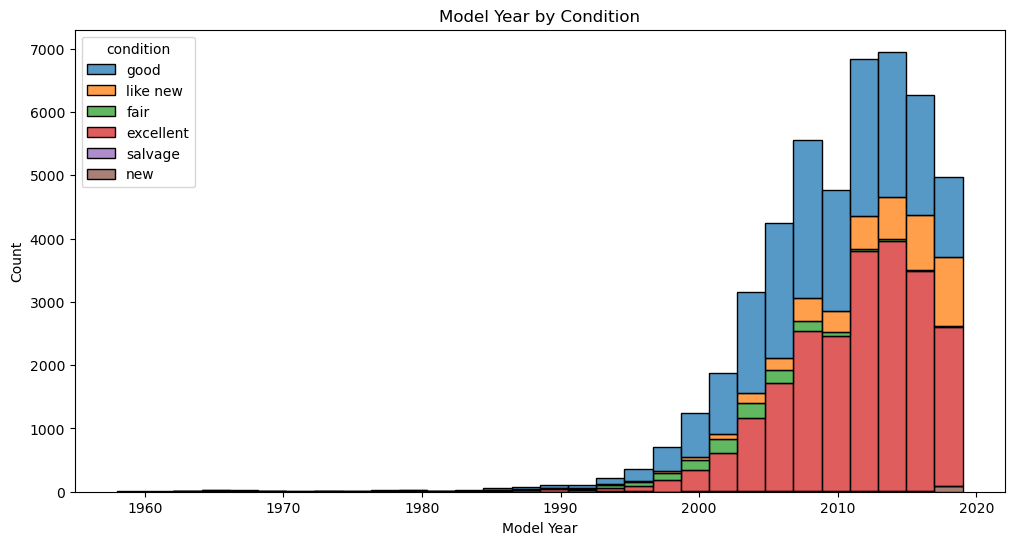

In [288]:
plt.figure(figsize=(12, 6))
sns.histplot(data=vehicles_df, x='model_year', hue='condition', multiple='stack', bins=30)
plt.title('Model Year by Condition')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.show()

c:\Users\djwor\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\djwor\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


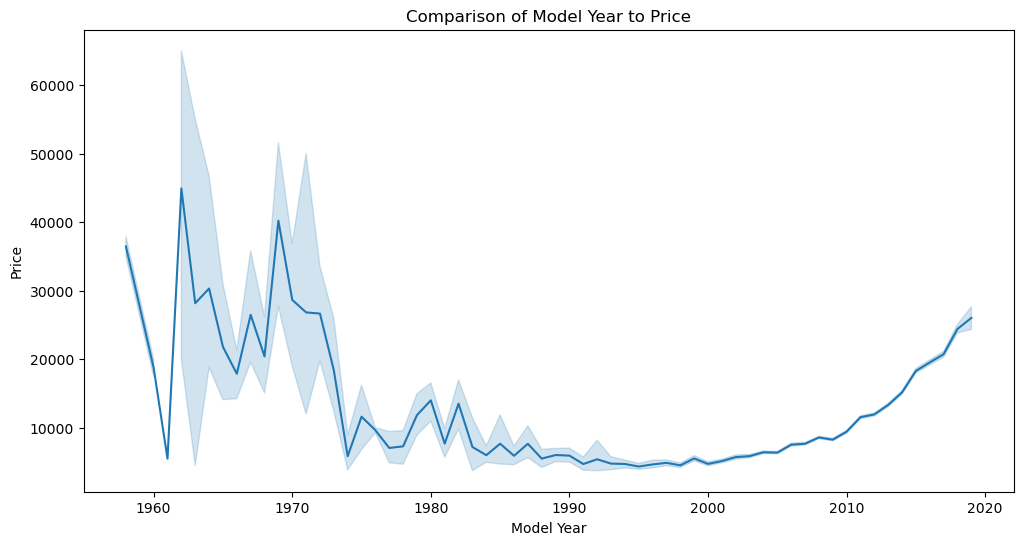

In [289]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=vehicles_df, x='model_year', y='price')
plt.title('Comparison of Model Year to Price')
plt.xlabel('Model Year')
plt.ylabel('Price')
plt.show()

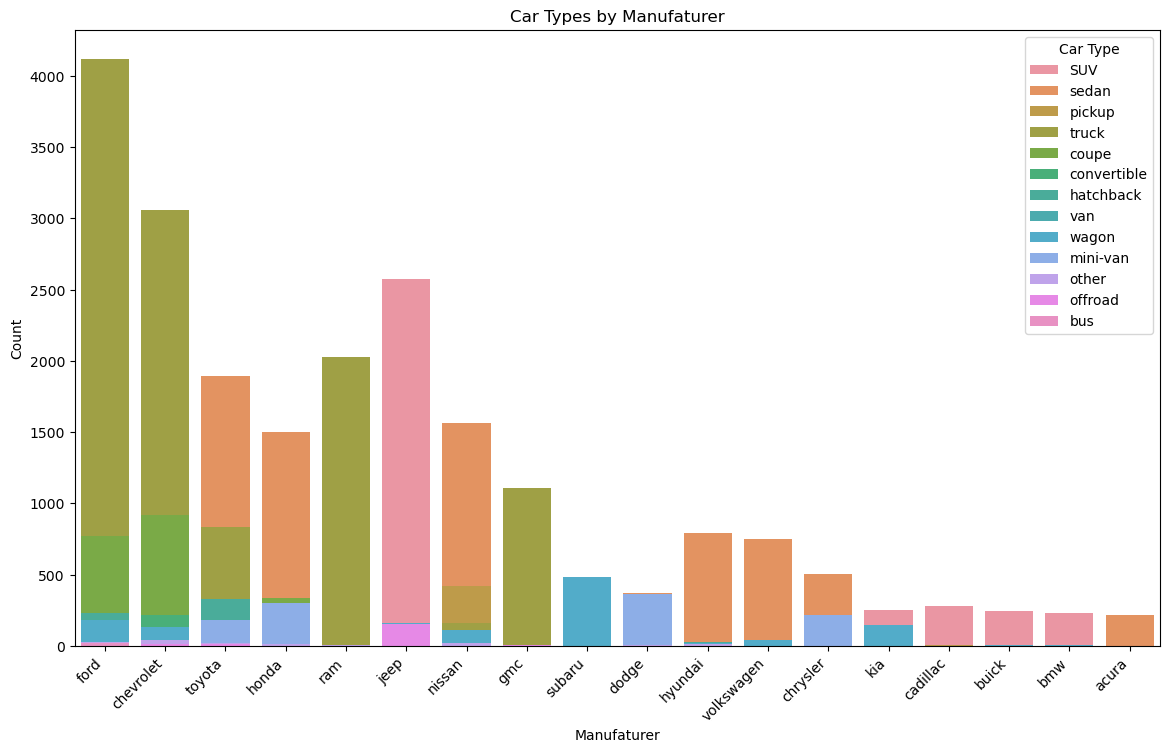

In [290]:
plt.figure(figsize=(14, 8))
sns.countplot(data=vehicles_df,x='make', hue='type', order=vehicles_df['make'].value_counts().index, dodge=False)
plt.title('Car Types by Manufaturer')
plt.xlabel('Manufaturer')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Car Type')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

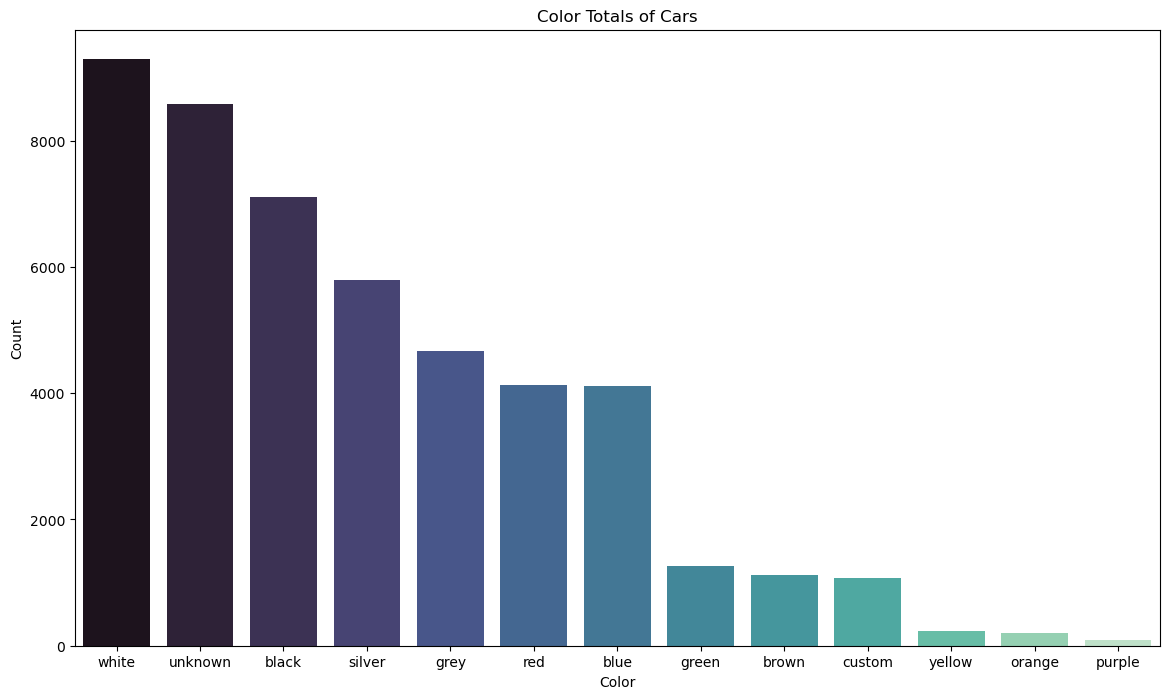

In [291]:

plt.figure(figsize=(14,8))
sns.countplot(data=vehicles_df,x='paint_color', order=vehicles_df['paint_color'].value_counts().index, palette='mako')
plt.title('Color Totals of Cars')
plt.xlabel('Color')
plt.ylabel('Count')
plt.show


In [292]:
#save new DataFrame with fixed data for use in the app
vehicles_df.to_csv("../vehicles_new_df.csv")

In [293]:
vehicles_df.head()



,price,model_year,make,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400.0,2011,bmw,x5,good,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19
2,5500.0,2013,hyundai,sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79
3,1500.0,2003,ford,f-150,fair,8,gas,175166.0,automatic,pickup,unknown,0,2019-03-22,9
4,14900.0,2017,chrysler,200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28
5,14990.0,2014,chrysler,300,excellent,6,gas,57954.0,automatic,sedan,black,1,2018-06-20,15
